# 1st STEP of 1st level. Titanic: Machine Learning from Disaster 

https://kaggle-kr.tistory.com/17?category=868316 사이트의 내용의 학습차원에서 복사함.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 1. 데이터셋 확인

In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


####  1.1 Null data check

In [10]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()
                                                                            /df_train[col].shape[0])) 
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [11]:
df_train.shape

(891, 12)

In [12]:
df_train[col].shape

(891,)

In [13]:
df_train[col].shape[0]

891

In [14]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()
                                                                            /df_test[col].shape[0])) 
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


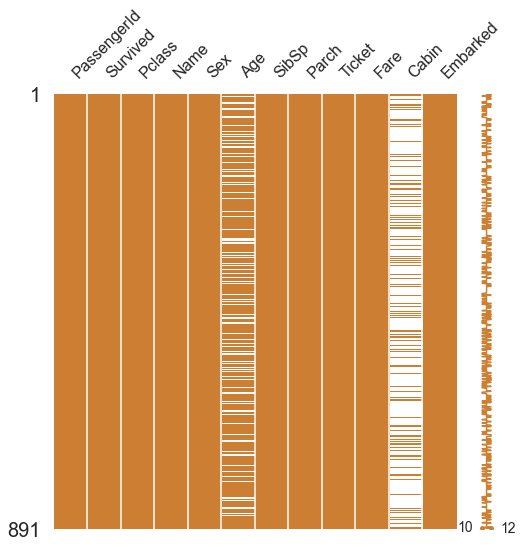

In [15]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8),color=(0.8, 0.5, 0.2))

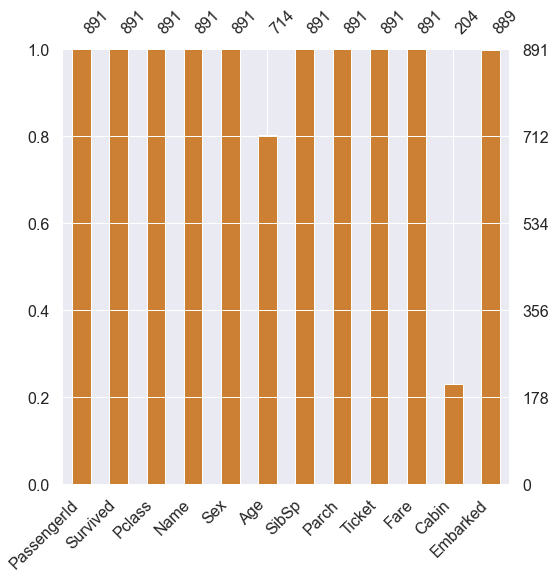

In [16]:
msno.bar(df=df_train, figsize=(8,8), color=(0.8, 0.5, 0.2))

#### 1.2 Target label 확인

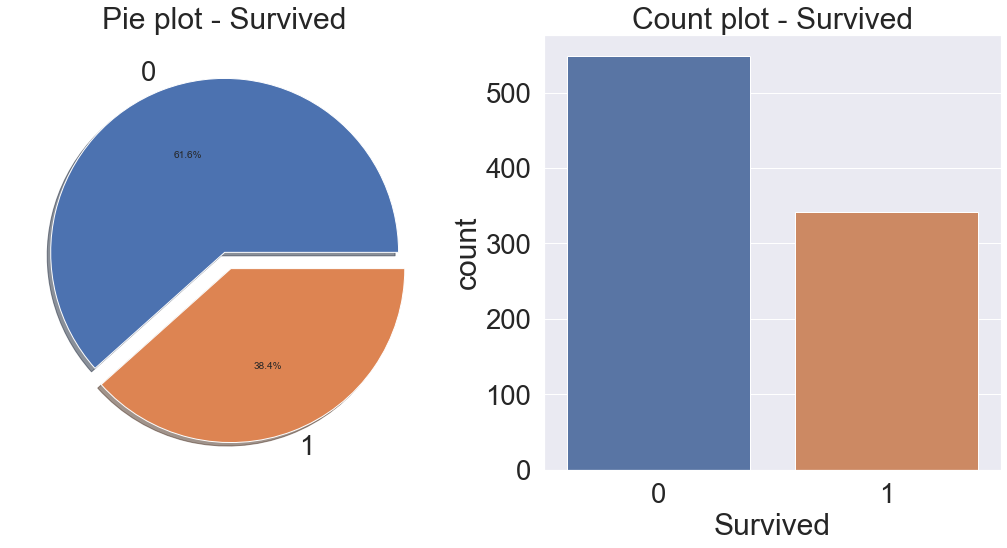

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', 
                                              ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [18]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

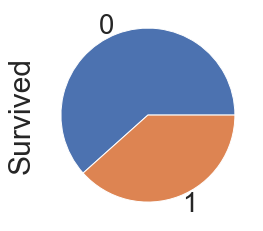

In [19]:
df_train['Survived'].value_counts().plot.pie()

### 2. 탐색적 데이터 분석(EDA, Exploratory Data Analysis)

- 이제 본격적으로 데이터 분석을 해보겠습니다. 데이터는 매우 많습니다. 이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요합니다.

- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편합니다.

#### 2.1 Pclass

In [20]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'],
                                        as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [21]:
df_train[['Pclass','Survived']].groupby(['Pclass'],
                                         as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [22]:
pd.crosstab(df_train['Pclass'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


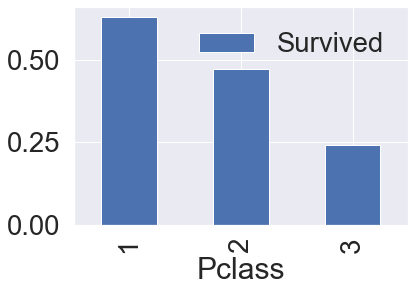

In [23]:
df_train[['Pclass','Survived']].groupby(['Pclass'],
                                       as_index=True).mean().sort_values(by='Survived',
                                                                        ascending=False).plot.bar()

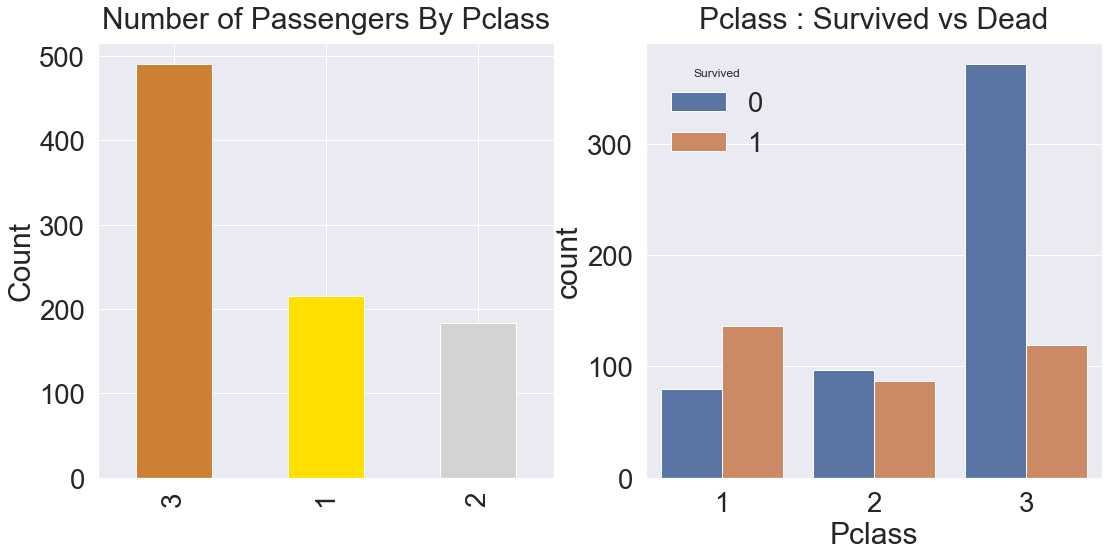

In [24]:
y_position = 1.02
f,ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(
    color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)
plt.show()

#### 2.2 Sex

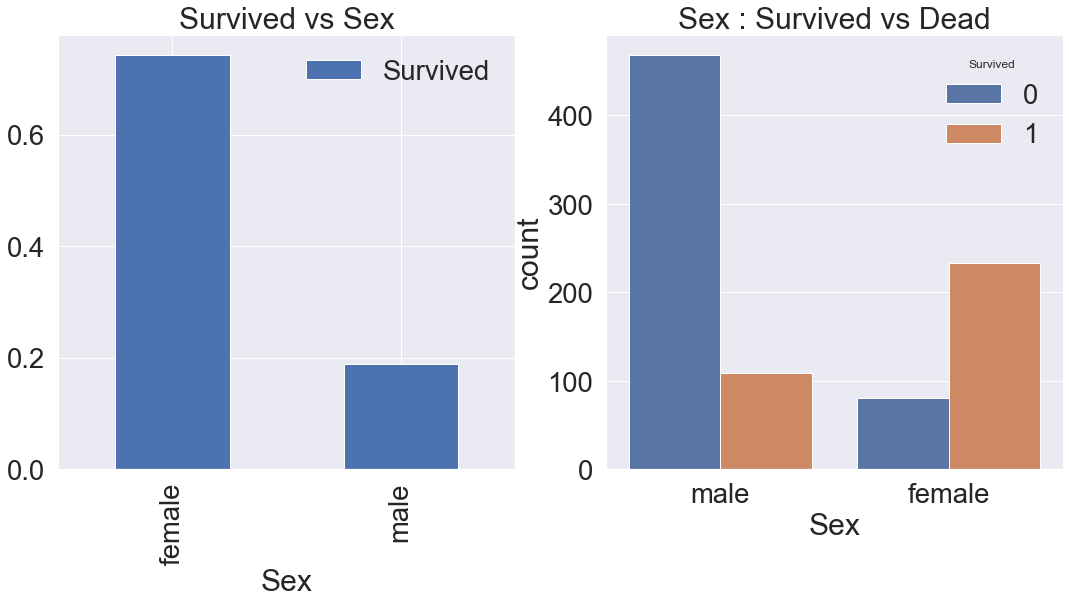

In [25]:
f,ax = plt.subplots(1,2,figsize=(18, 8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

In [26]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
pd.crosstab(df_train['Sex'],df_train['Survived']
            ,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


#### 2.3 Both Sex and Pclass

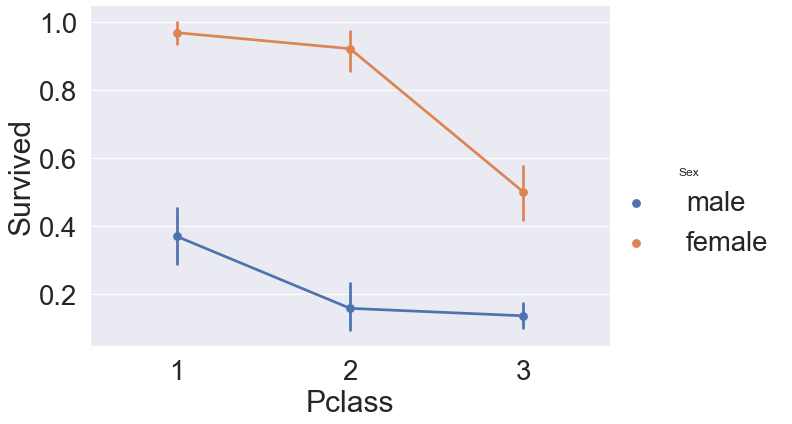

In [28]:
sns.factorplot('Pclass','Survived', hue='Sex', data= df_train, size=6, aspect=1.5)

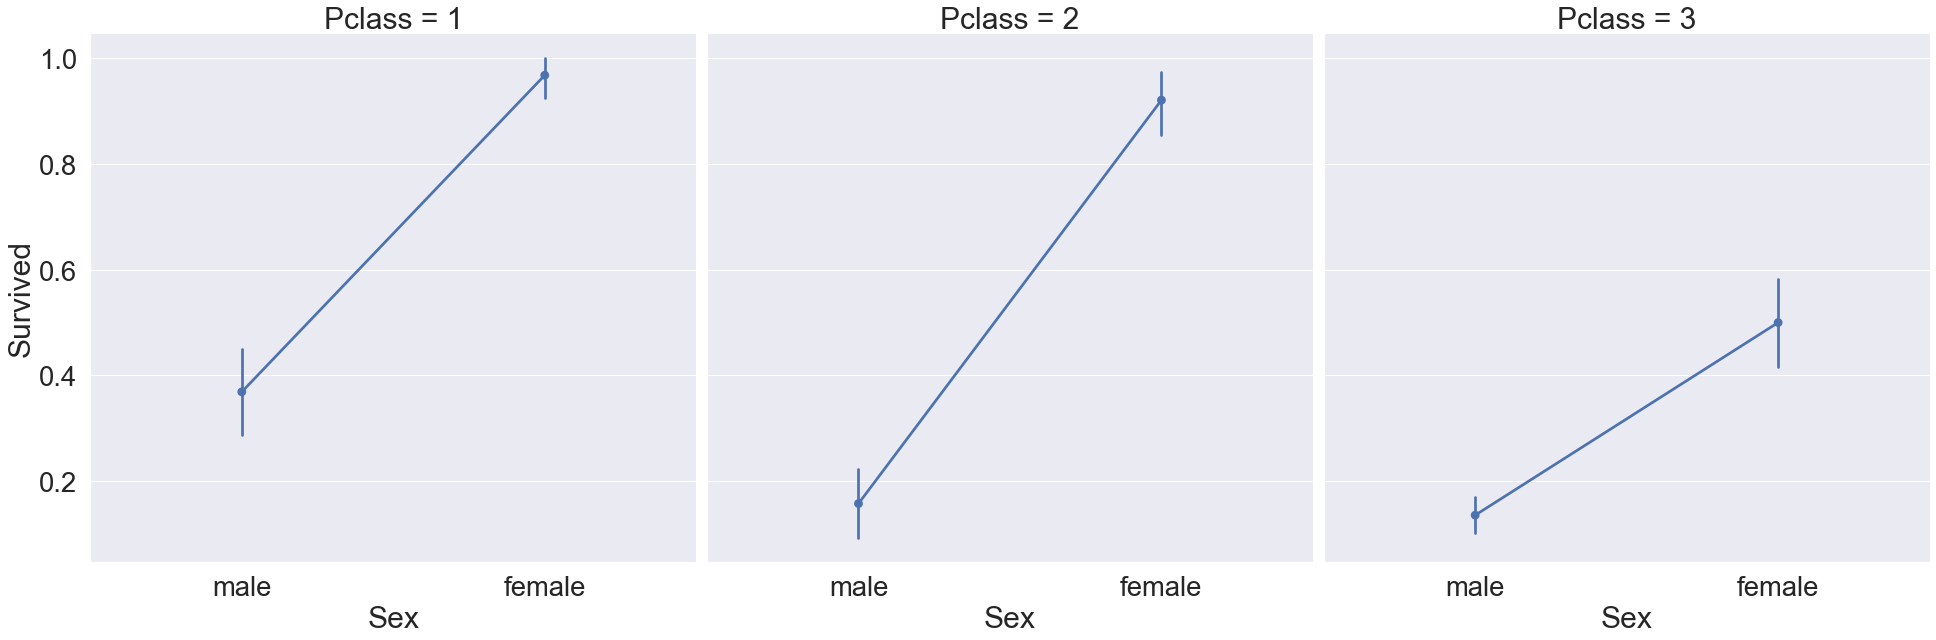

In [29]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5, size=9, aspect=1)

#### 2.4 Age

In [30]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_test['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_test['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_test['Age'].mean()))

제일 나이 많은 탑승객 : 76.0 Years
제일 어린 탑승객 : 0.2 Years
탑승객 평균 나이 : 30.3 Years


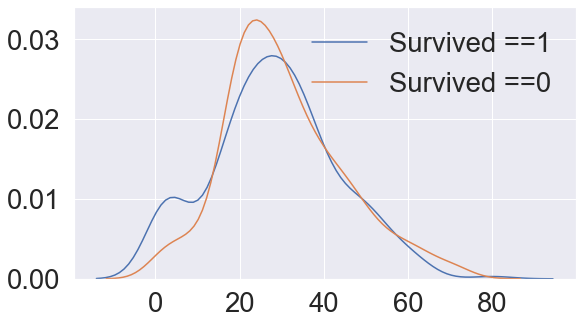

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived ==1','Survived ==0'])
plt.show()

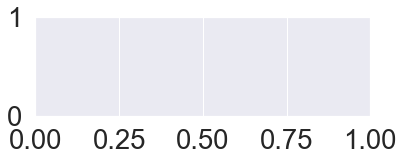

In [32]:
# subplot의 예
plt.subplot(2,1,2)
plt.show()

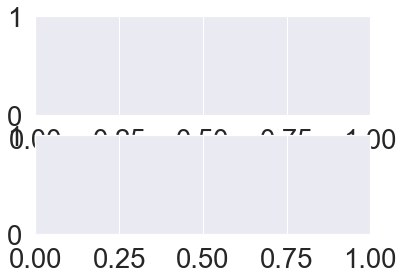

In [33]:
# subplots의 예
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.show()

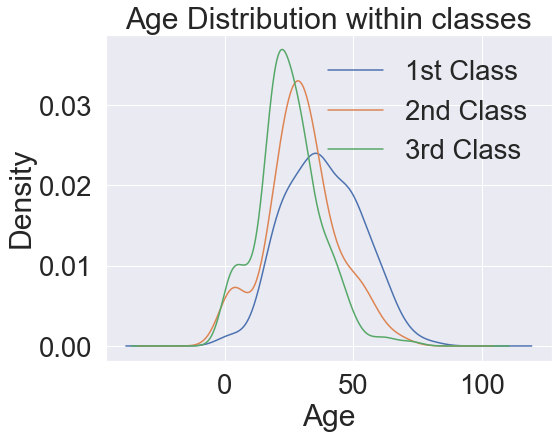

In [34]:
# Age distribution in classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

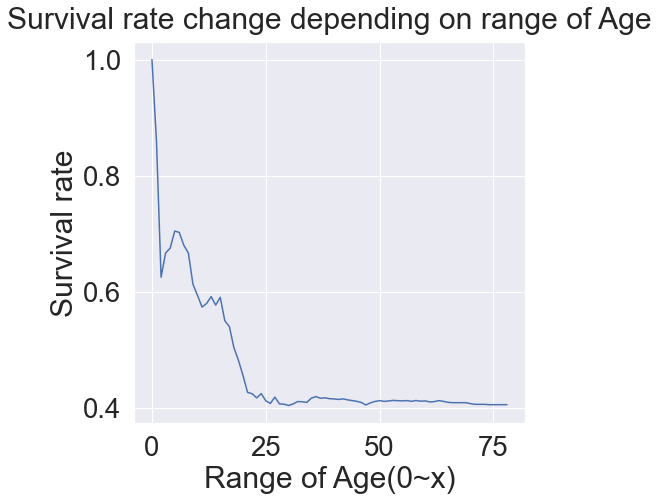

In [35]:
cummulate_survival_ratio = []
for i in range (1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/
                                   len(df_train[df_train['Age']<i]['Survived']))
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

#### 2.5 Pclass, Sex, Age

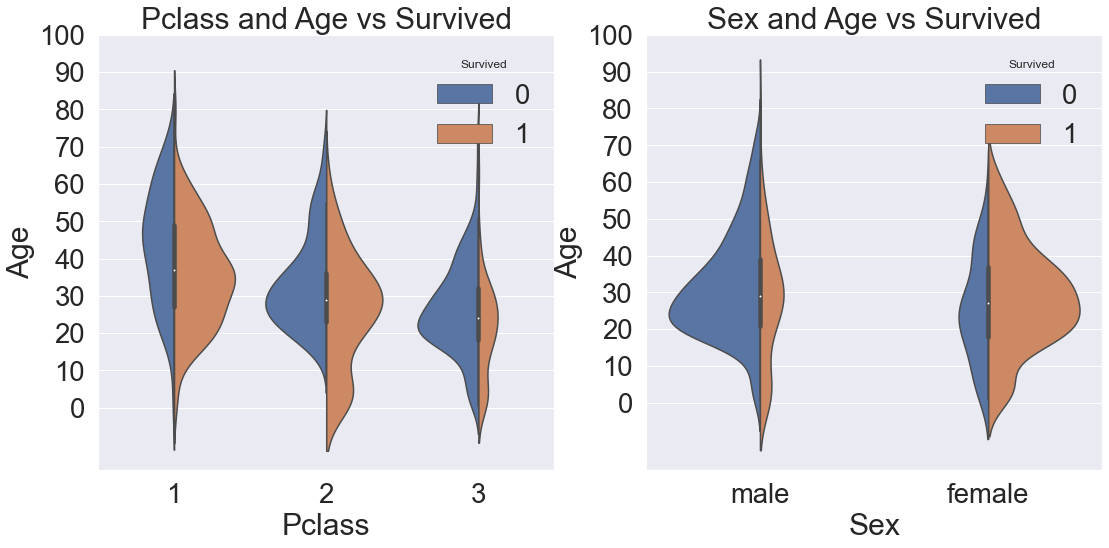

In [36]:
f,ax = plt.subplots(1,2, figsize=(18,8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train,scale='count',
               split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train,scale='count',
               split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

#### 2.6 Embarked

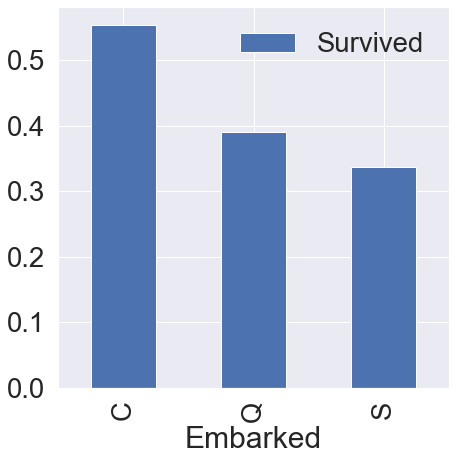

In [37]:
f,ax = plt.subplots(1, 1, figsize=(7, 7))

df_train[['Embarked','Survived']].groupby(['Embarked']
                                          ,as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

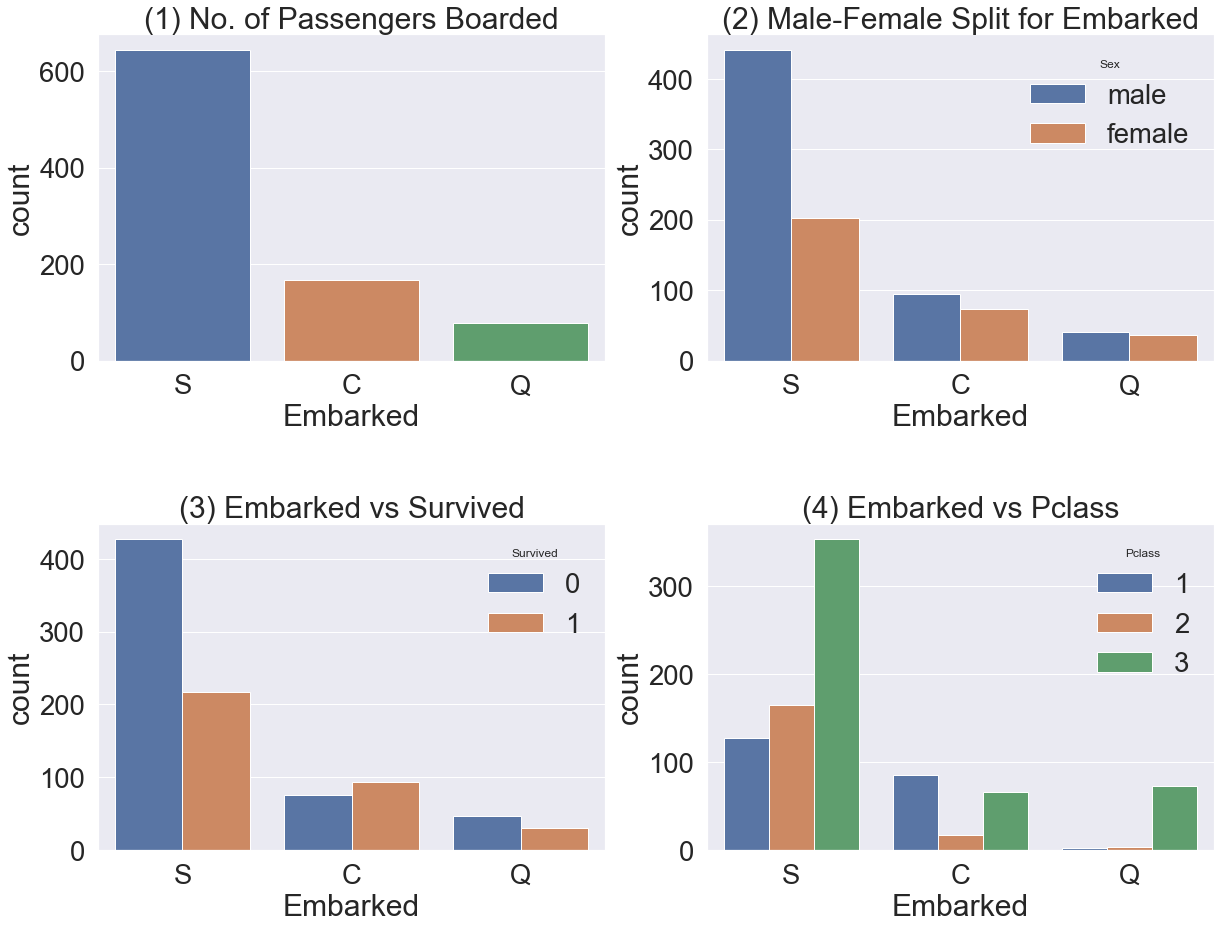

In [38]:
f, ax= plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


#### 2.7 Family - Sibsp(형제 자매) + Parch(부모 자녀)

In [39]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 

In [40]:
print("Maximum size of Family : ", df_train['FamilySize'].max())
print("Minimum size of Family : ", df_train['FamilySize'].min())

Maximum size of Family :  11
Minimum size of Family :  1


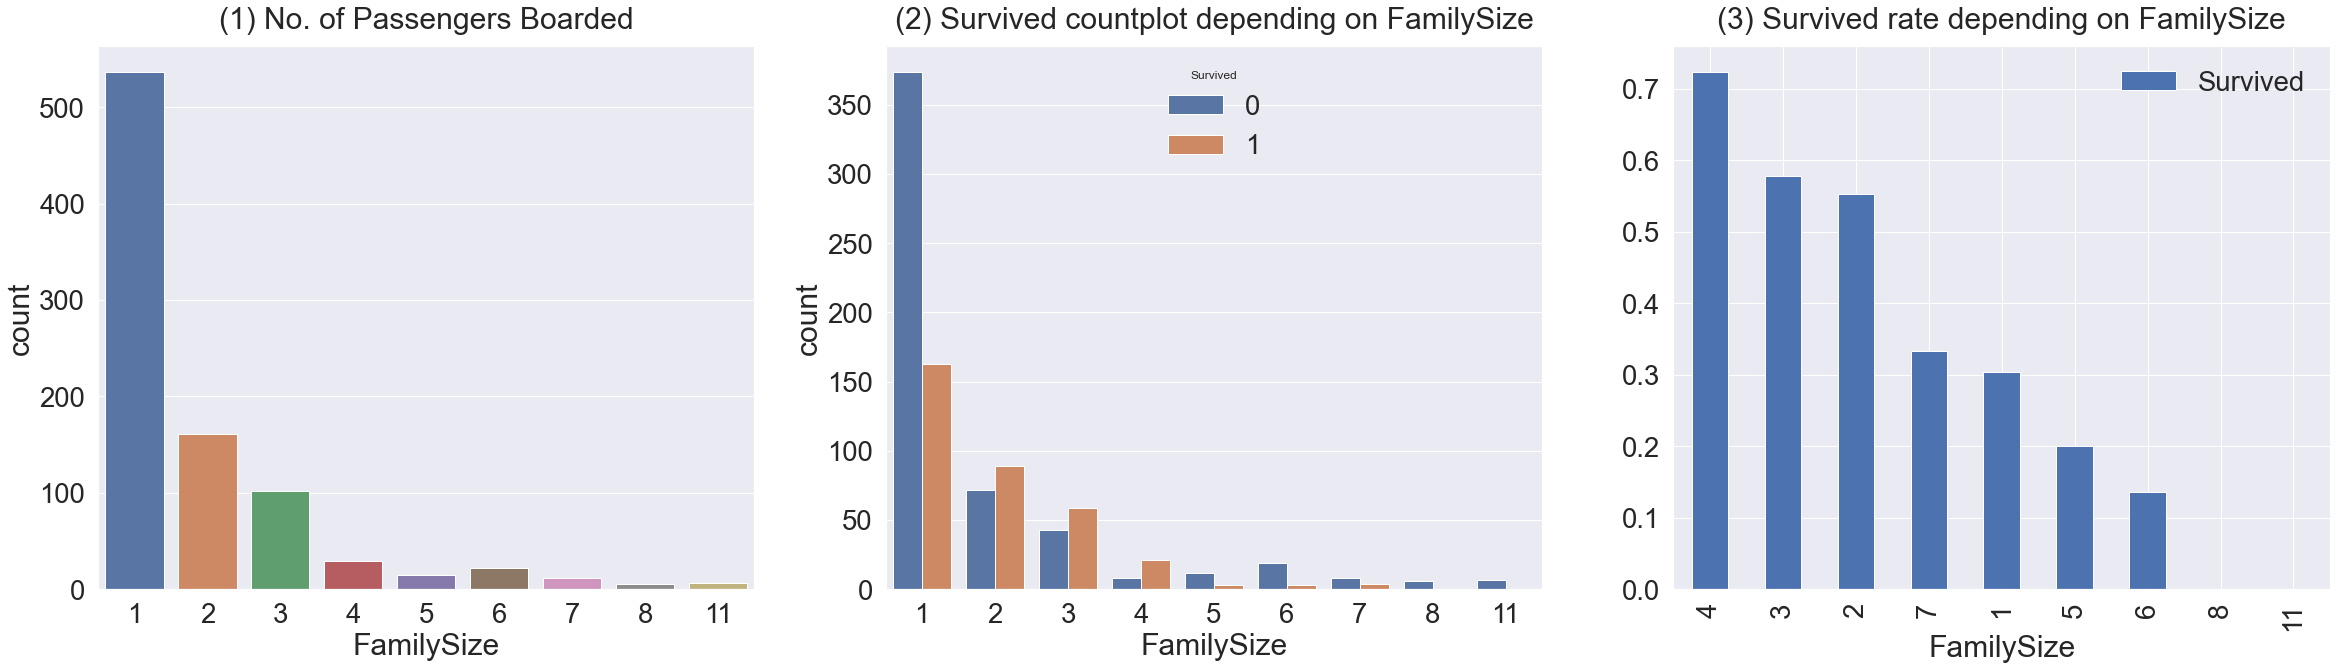

In [41]:
f, ax= plt.subplots(1,3,figsize = (40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)

sns.countplot('FamilySize',hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'],
                                          as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### 2.8 Fare

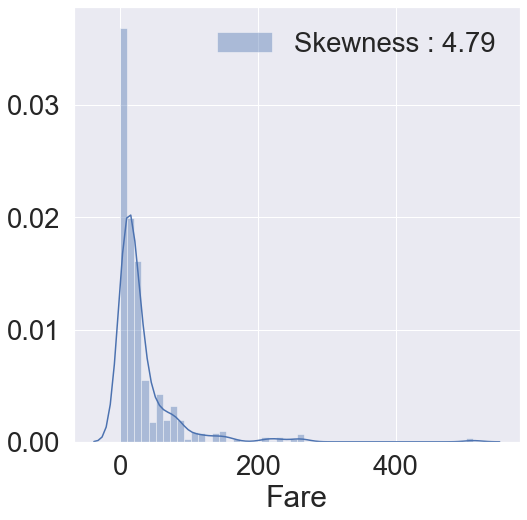

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', 
                 label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [43]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() 
# testset 에 있는 nan value 를 평균값으로 치환



df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

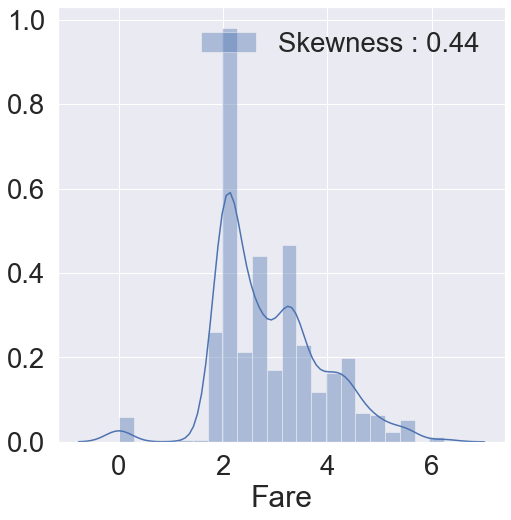

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', 
                 label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#### 2.9 Cabin

이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.  
그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


#### 2.10 Ticket

In [46]:
df_train['Ticket'].value_counts()

347082           7
CA. 2343         7
1601             7
CA 2144          6
3101295          6
                ..
C.A. 24580       1
312992           1
C.A. 29566       1
SC/PARIS 2167    1
SC/PARIS 2133    1
Name: Ticket, Length: 681, dtype: int64

In [47]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



%matplotlib inline

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

### 3. Feature engineering

#### 3.1 Fill Null

In [48]:
df_train['Initial']=df_train.Name
df_train['Initial'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Initial, dtype: object

In [49]:
df_train['Initial']=df_train.Name.str
df_train['Initial']

0      <pandas.core.strings.StringMethods object at 0...
1      <pandas.core.strings.StringMethods object at 0...
2      <pandas.core.strings.StringMethods object at 0...
3      <pandas.core.strings.StringMethods object at 0...
4      <pandas.core.strings.StringMethods object at 0...
                             ...                        
886    <pandas.core.strings.StringMethods object at 0...
887    <pandas.core.strings.StringMethods object at 0...
888    <pandas.core.strings.StringMethods object at 0...
889    <pandas.core.strings.StringMethods object at 0...
890    <pandas.core.strings.StringMethods object at 0...
Name: Initial, Length: 891, dtype: object

In [50]:
df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.') 

In [51]:
df_train['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [52]:
df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.') #extract the Salutation
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #extract the Salutations

In [53]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(
    cmap='summer_r') #checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [54]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                             'Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other'
                         ,'Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                            'Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs',
                         'Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [55]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


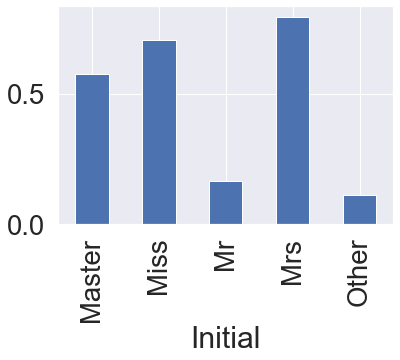

In [56]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [57]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [58]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [59]:
print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null vlaues')

Embarked has 2 Null vlaues


In [60]:
df_train['Embarked'].fillna('S', inplace=True)

#### 3.2 Change Age(continuous to categorical)

In [61]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10<=df_train['Age']) & (df_train['Age']<20), 'Age_cat'] = 1
df_train.loc[(20<=df_train['Age']) & (df_train['Age']<30), 'Age_cat'] = 2
df_train.loc[(30<=df_train['Age']) & (df_train['Age']<40), 'Age_cat'] = 3
df_train.loc[(40<=df_train['Age']) & (df_train['Age']<50), 'Age_cat'] = 4
df_train.loc[(50<=df_train['Age']) & (df_train['Age']<60), 'Age_cat'] = 5
df_train.loc[(60<=df_train['Age']) & (df_train['Age']<70), 'Age_cat'] = 6
df_train.loc[70<=df_train['Age'], 'Age_cat']=70

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10<=df_test['Age']) & (df_test['Age']<20), 'Age_cat'] = 1
df_test.loc[(20<=df_test['Age']) & (df_test['Age']<30), 'Age_cat'] = 2
df_test.loc[(30<=df_test['Age']) & (df_test['Age']<40), 'Age_cat'] = 3
df_test.loc[(40<=df_test['Age']) & (df_test['Age']<50), 'Age_cat'] = 4
df_test.loc[(50<=df_test['Age']) & (df_test['Age']<60), 'Age_cat'] = 5
df_test.loc[(60<=df_test['Age']) & (df_test['Age']<70), 'Age_cat'] = 6
df_test.loc[70<=df_test['Age'], 'Age_cat']=70

In [62]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1 
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train['Age_cat_2']=df_train['Age'].apply(category_age) 

In [63]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ', 
      (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->  False


In [64]:
# 중복되는 Age_cat 컬럼과 원래 컬럼 Age 를 제거하겠습니다.

df_train.drop(['Age','Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

#### 3.3 Change Initial, Embarked and Sex (string to numerical)

In [65]:
df_train['Initial']=df_train['Initial'].map(
    {'Master':0, 'Miss':1,'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial']=df_test['Initial'].map(
    {'Master':0, 'Miss':1,'Mr':2, 'Mrs':3, 'Other':4})

In [66]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [67]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [68]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [69]:
df_train['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [70]:
df_train['Embarked'].isnull().any()

False

In [71]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

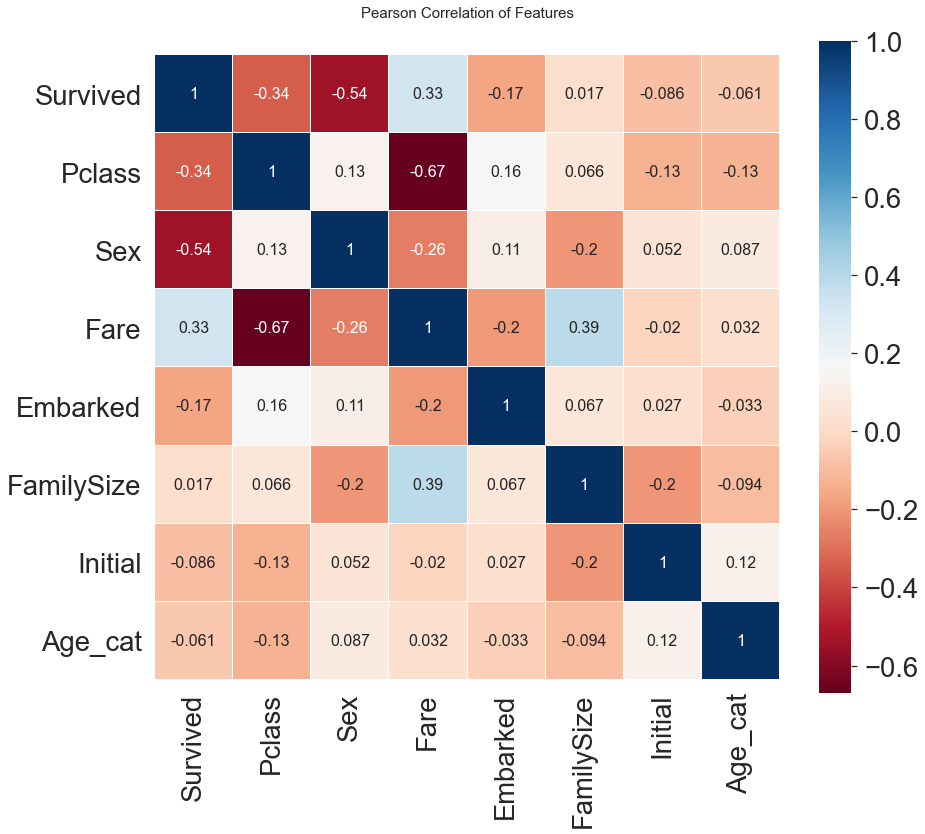

In [72]:
heatmap_data = df_train[['Survived', 'Pclass', 
                         'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 
colormap = plt.cm.RdBu

plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(heatmap_data.astype(float).corr(),linewidths=0.1, vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True, annot_kws={"size" : 16})

del heatmap_data

#### 3.4 One-hot encoding on Initial and Embarked

In [73]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix= 'Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [74]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,2.564949,NaN,2,1,2,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,3.401197,B42,2,1,1,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,3.154870,NaN,2,4,2,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,3.401197,C148,0,1,2,0,0,1,0,0


In [75]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix= 'Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

#### 3.5 Drop columns

In [76]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [77]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [78]:
df_test.head()
#train 의 Survived feature(target class)를 빼면 train, test 둘다 같은 columns 를 가진 걸 확인

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


### 4. Building machine learning model and prediction using the trained model

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  #<--- 모델의 평가를 위해 사용
from sklearn.model_selection import train_test_split  #<-- training set을 나눠주는 함수

#### 4.1 Preparation - Split dataset into train, valid, test set

In [84]:
X_train =df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values

X_test = df_test.values

In [85]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

#### 4.2 Model generation and prediction

In [86]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [87]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction,y_vld)))

총 268명 중 83.21% 정확도로 생존을 맞춤


#### 4.3 Feature importance

학습된 모델은 `feature importance` 를 가지게 되는데, 우리는 이것을 확인하여 `지금 만든 모델이 어떤 feature 에 영향을 많이 받았는지` 확인할 수 있습니다.  
학습된 모델은 기본적으로 featureimportances 를 가지고 있어서 쉽게 그 수치를 얻을 수 있습니다.  
`pandas series 를 이용`하면 쉽게 sorting 을 하여 그래프를 그릴 수 있습니다.

In [88]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

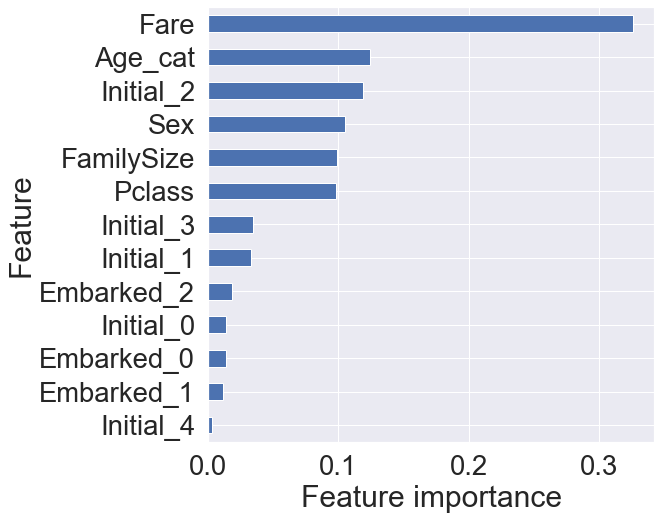

In [89]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

#### 4.4 Prediction on Test set 

In [90]:
submission = pd.read_csv('gender_submission.csv')

In [91]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [92]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [93]:
submission.to_csv('my_first_submission.csv', index=False)